### Background

This is an analysis of all listings of real estate sales with a sales price of $2,000 or greater, that occurred between 2001 and 2020 in Connecticut, as collected and maintained by The Office of Policy and Management.

This dataset was provided by Quantum Analytics and it includes records such as the town, property address, date of sale, assessed value, sale amount, sales ratio, property type, and more, offering a rich source of insights into the real estate landscape.

### Problem Statement

Preprocess, analyze, and visualize the real estate sales data, thereby exploring property assessment and generating meaningful insights  for informed decision-making.

Expected outcomes include:
- Uncover insights into the accuracy of property assessments, identifying areas where adjustments may be necessary.
- Gain a nuanced understanding of market trends, allowing stakeholders to make informed decisions based on current and historical data.
- Provide localized insights for different towns, assisting in regional planning and investment decisions.
- Understand the impact of property type on assessment outcomes, helping to tailor strategies for different segments of the real estate market.
- Investigate the role of non-use codes in property assessment, identifying patterns and potential areas for policy refinement.
- Utilize assessor and OPM remarks to improve communication and transparency in the assessment process.

### Data Dictionary

1. Serial Number: Integer, A unique identifier assigned to each record in the dataset.
2. List Year: Integer or Date, the year in which the property information was listed or assessed.
3. Date Recorded: Date, the date when the property information was recorded or updated.
4. Town: String, the name of the town or locality where the property is located.
5. Address: String, the specific address or location details of the property.
6. Assessed Value: Integer, the assessed monetary value of the property, typically determined by a local assessor for taxation purposes.
7. Sale Amount: Integer, the amount for which the property was sold, if applicable.
8. Sales Ratio: float, the ratio of the sale amount to the assessed value, providing an indication of the property's market value.
9. Property Type: Categorical, the general category or classification of the property (e.g., residential, commercial, industrial).
10. Residential Type: Categorical, further classification specifying the residential type (e.g., single-family, multi-family) if applicable.
11. Non-Use Code: Categorical, a code indicating the non-use status of the property, which might include information about exemptions or special classifications.
12. Assessor Remarks, String, additional remarks, or comments provided by the assessor related to the property assessment.
13. OPM Remarks; String, remarks or comments from the Office of Policy and Management (OPM) related to the property data, providing additional context or information.

### Data Preparation

In [693]:
# import neccessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import warnings

# for visuals
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'

from sklearn.preprocessing import LabelEncoder

# suppress warnings
warnings.filterwarnings("ignore")



In [694]:
# load and read file
df = pd.read_csv(r"C:\Users\Jola\OneDrive\Desktop\Real Estate Sales 2001-2020_GL.csv")

In [695]:
# first 5 rows of the file
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [696]:
# last 5 rows of the file
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN
997212,190344,2019,12/20/2019,Milford,250 RESEARCH DR,4035970.0,7450000.0,0.541700,NaN,NaN,NaN,NaN,NaN,NaN


In [697]:
# shape of the data
df.shape

(997213, 14)

In [698]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


#### Observations

The dtype of the 'Date Recorded' column needs to be changed to datetime.

In [699]:
# check for null values
df.isnull()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,False,False,False,False,False,False,False,False,False,False,False,True,True,True
997209,False,False,False,False,False,False,False,False,False,False,False,False,True,True
997210,False,False,False,False,False,False,False,False,False,False,True,True,True,True
997211,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [700]:
df.isna().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

In [701]:
df.isna().sum().sum()

4112484

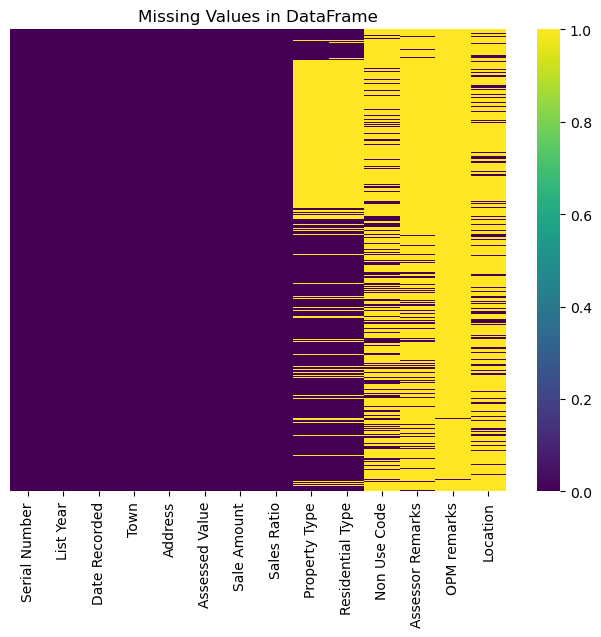

In [702]:
#  visualize the missing values using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Values in DataFrame')
plt.show()

##### Observations

- There is a total of 4112484 null values.
- The affected columns include Date Recorded, Address, Property Type, Residential Type, Non Use Code, Assessor Remarks, OPM Remarks, and Location.

In [703]:
# check columns
df.columns.tolist()

['Serial Number',
 'List Year',
 'Date Recorded',
 'Town',
 'Address',
 'Assessed Value',
 'Sale Amount',
 'Sales Ratio',
 'Property Type',
 'Residential Type',
 'Non Use Code',
 'Assessor Remarks',
 'OPM remarks',
 'Location']

In [704]:
# check the columns that are categorical
cat_cols = df.select_dtypes(include = ['category', 'object']).columns
cat_cols

Index(['Date Recorded', 'Town', 'Address', 'Property Type', 'Residential Type',
       'Non Use Code', 'Assessor Remarks', 'OPM remarks', 'Location'],
      dtype='object')

In [705]:
# check the columns that are numerical
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
num_cols

['Serial Number', 'List Year', 'Assessed Value', 'Sale Amount', 'Sales Ratio']

### Data Exploration

- Handle the missing values.
- Convert the 'Date Recorded' column to a datetime dtype.
- Change 'Address' and 'Assesor Remarks' columns to proper case.
- Change column-header 'OPM reMARKS' to 'OPM Remarks'.

In [706]:
# replace 'Single Family' with 'Unknown' in the 'Property Type' column
df['Property Type'] = df['Property Type'].replace('Single Family', 'Unknown')

In [707]:
# replace null values with 'Not Specified' in the 'Property Type' column
df['Property Type'].fillna('Unknown', inplace=True)


# fill the missing values in 'Non Use Code ' with its mode
df['Non Use Code'].fillna(df['Non Use Code'].mode()[0], inplace=True)


# fill the missing values in 'Date Recorded ' with its mode
df['Date Recorded'].fillna(df['Date Recorded'].mode()[0], inplace=True)


# fill the missing values in 'Assessor Remarks with 'Not Specified'
df['Assessor Remarks'].fillna('Not Specified', inplace=True)  

# rename the 'OPM remarks' column header'
df.rename(columns={'OPM remarks': 'OPM Remarks'}, inplace=True)
# fill the missing values in 'OPM Remarks' with 'Not Specified'
df['OPM Remarks'].fillna('Not Specified', inplace=True)


# fill the missing values in 'Location ' with 'Unknown' 
df['Location'].fillna('Unknown', inplace=True)


# fill the missing values in 'Address' with 'Unknown' 
df['Address'].fillna('Unknown', inplace=True)


# fill the missing values in 'Residential Type ' with 'Unknown' 
df['Residential Type'].fillna('Unknown', inplace=True)


# check the head of the column
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM Remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Unknown,25 - Other,Not Specified,Not Specified,Unknown
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,25 - Other,Not Specified,Not Specified,Unknown
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown


In [708]:
# change 'Date Recorded' dtype to datetime
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], format='%m/%d/%Y')

In [709]:
display(df[['List Year', 'Date Recorded']].head())
print(df[['List Year', 'Date Recorded']].info())

,List Year,Date Recorded
0,2020,2021-09-13
1,2020,2020-10-02
2,2020,2021-03-09
3,2020,2021-04-13
4,2020,2021-07-02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   List Year      997213 non-null  int64         
 1   Date Recorded  997213 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.2 MB
None


In [710]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM Remarks,Location
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Unknown,25 - Other,Not Specified,Not Specified,Unknown
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,25 - Other,Not Specified,Not Specified,Unknown
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown


In [711]:
# change 'Address' to sentence case
df['Address'] = df['Address'].str.title()

# change 'Assessor Remarks' to sentence case
df['Assessor Remarks'] = df['Assessor Remarks'].str.title()

In [712]:
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM Remarks,Location
0,2020348,2020,2021-09-13,Ansonia,230 Wakelee Ave,150500.0,325000.0,0.4630,Commercial,Unknown,25 - Other,Not Specified,Not Specified,Unknown
1,20002,2020,2020-10-02,Ashford,390 Turnpike Rd,253000.0,430000.0,0.5883,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown
2,200212,2020,2021-03-09,Avon,5 Chestnut Drive,130400.0,179900.0,0.7248,Residential,Condo,25 - Other,Not Specified,Not Specified,Unknown
3,200243,2020,2021-04-13,Avon,111 Northington Drive,619290.0,890000.0,0.6958,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown
4,200377,2020,2021-07-02,Avon,70 Far Hills Drive,862330.0,1447500.0,0.5957,Residential,Single Family,25 - Other,Not Specified,Not Specified,Unknown


In [713]:
df.isna().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM Remarks         0
Location            0
dtype: int64

In [714]:
# replace 'file_name.csv' with the desired file name

df.to_csv('Updated_Real_Estate_2001_2020.csv')

### Key Insights

#### Assessment Accuracy 
- Evaluate the accuracy of property assessments by comparing assessed values with actual sale amounts, and identify          discrepancies.

In [715]:
# calculate average Assessed Value, Sale Amount and Sales Ratio of properties from year to year
average_av = df.groupby(df['List Year'])['Assessed Value'].mean()
average_sa = df.groupby(df['List Year'])['Sale Amount'].mean()
average_sr = df.groupby(df['List Year'])['Sales Ratio'].mean()

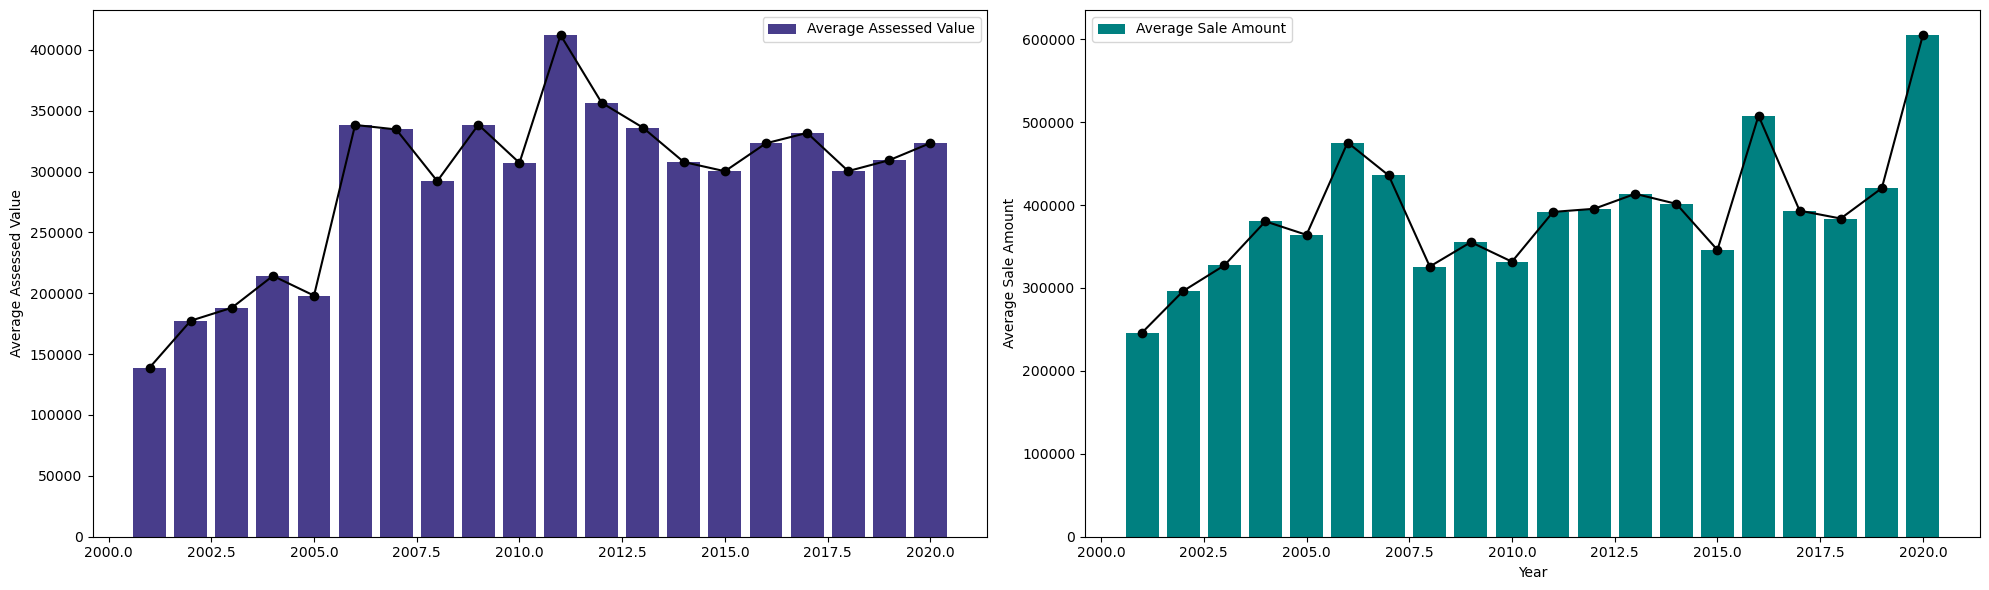

In [716]:
# create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), sharex=True)


# bar chart for average assessed value
ax1.bar(average_av.index, average_av.values, label='Average Assessed Value', color='darkslateblue')
ax1.plot(average_av.index, average_av.values, marker='o', color='black')
ax1.set_ylabel('Average Assessed Value')
ax1.legend()

# bar chart for average sale amount
ax2.bar(average_sa.index, average_sa.values, label='Average Sale Amount', color='teal')
ax2.plot(average_sa.index, average_sa.values, marker='o', color='black')
ax2.set_ylabel('Average Sale Amount')
ax2.legend()

# set common xlabel
plt.xlabel('Year')

# show the plot
plt.tight_layout()
plt.show()

##### Observations

- Sale Amount were typically higher than the Assessed value
- The highest sale was in the year 2020.


#### Market Trends 

Analyze sales ratios to uncover trends in property market values, understanding how sale amounts relate to  the assessed values across different property types and residential classifications

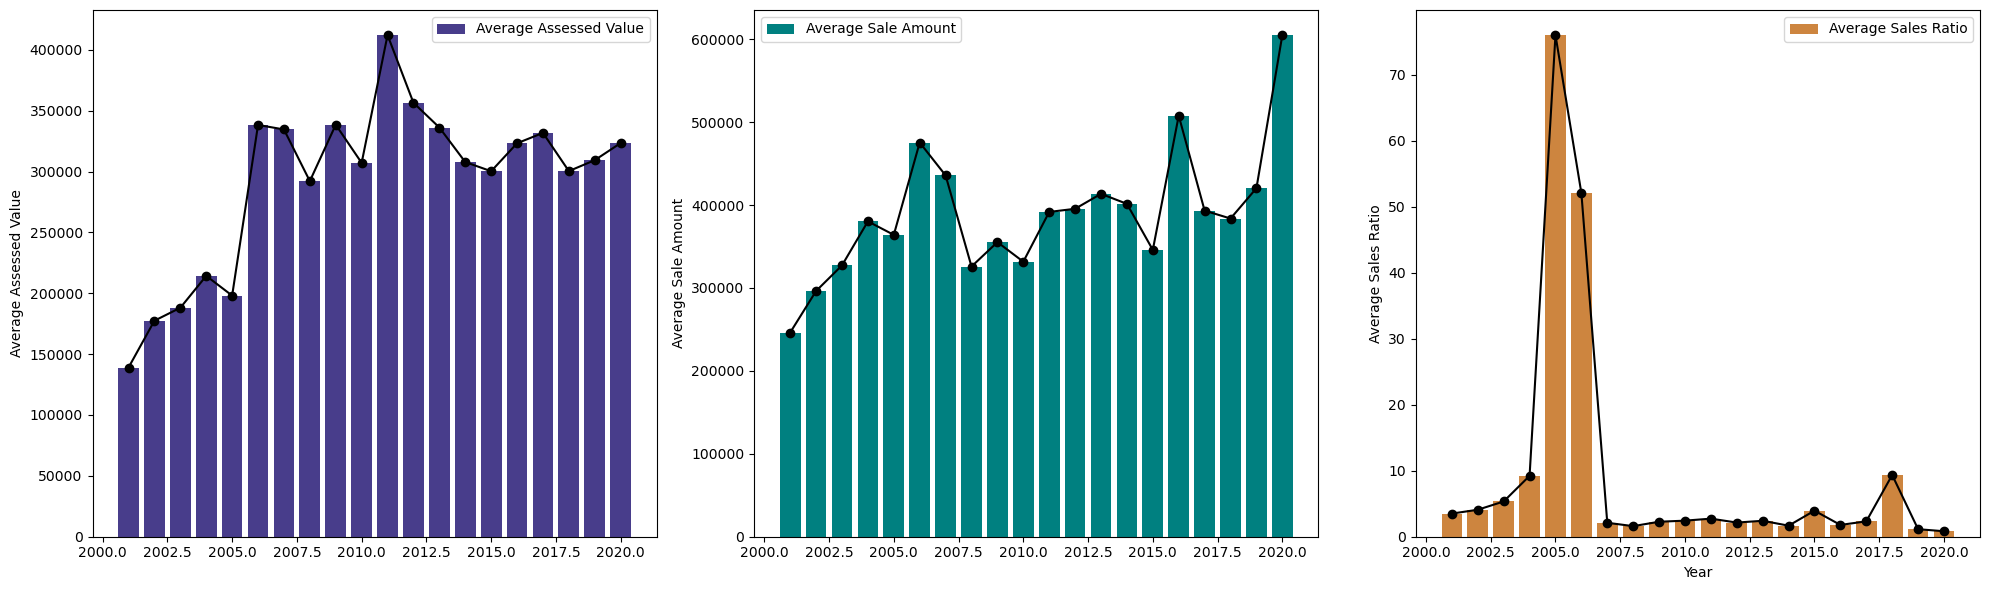

In [717]:
# for market trends over years
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), sharex=True)


# bar chart for average assessed value
ax1.bar(average_av.index, average_av.values, label='Average Assessed Value', color='darkslateblue')
ax1.plot(average_av.index, average_av.values, marker='o', color='black')
ax1.set_ylabel('Average Assessed Value')
ax1.legend()

# bar chart for average sale amount
ax2.bar(average_sa.index, average_sa.values, label='Average Sale Amount', color='teal')
ax2.plot(average_sa.index, average_sa.values, marker='o', color='black')
ax2.set_ylabel('Average Sale Amount')
ax2.legend()

# bar chart for average sales ratio
ax3.bar(average_sr.index, average_sr.values, label='Average Sales Ratio', color='peru')
ax3.plot(average_sr.index, average_sr.values, marker='o', color='black')
ax3.set_ylabel('Average Sales Ratio')
ax3.legend()

# set common xlabel
plt.xlabel('Year')

# show the plot
plt.tight_layout()
plt.show()

##### Observation
Sales Ratio were the highest between 2005 -2006' followed by 2018.

In [718]:
df['Sales Ratio'].describe()

count    9.972130e+05
mean     1.044637e+01
std      1.890192e+03
min      0.000000e+00
25%      4.867000e-01
50%      6.246000e-01
75%      7.852761e-01
max      1.226420e+06
Name: Sales Ratio, dtype: float64

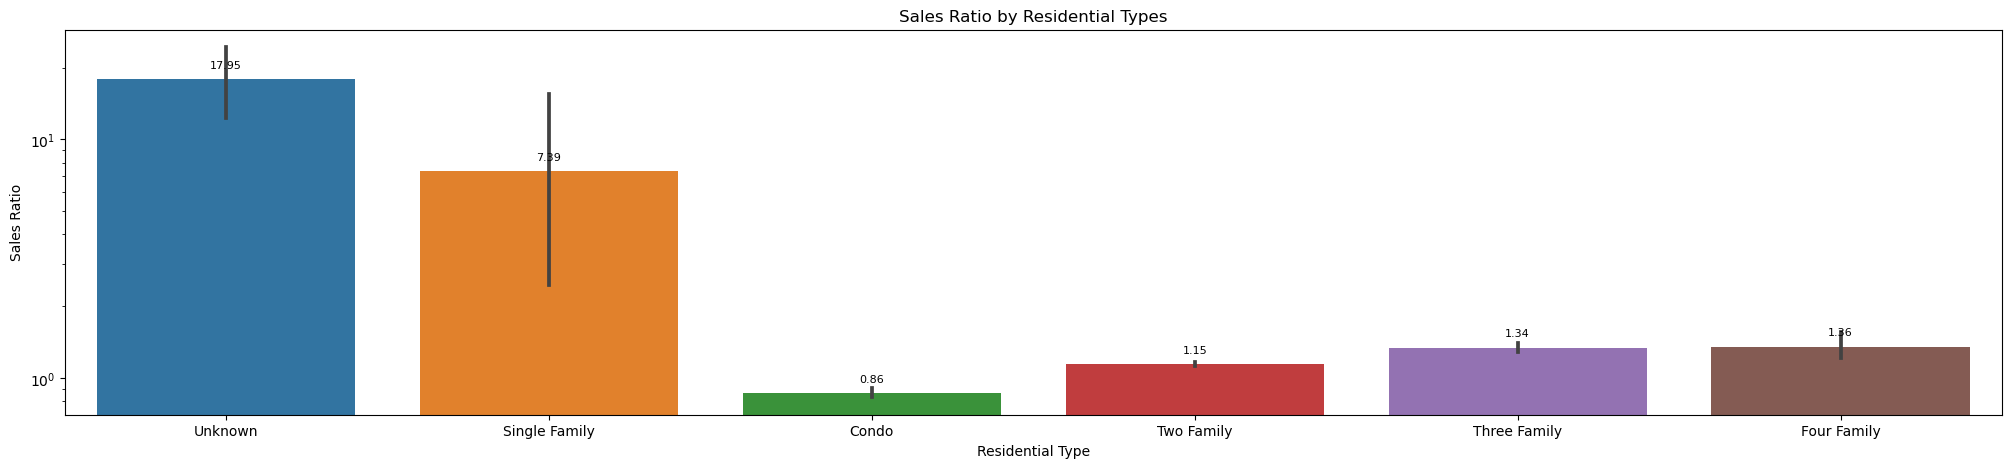

In [719]:
# for sales ratio across residential types
plt.figure(figsize=(25, 5))
b = sns.barplot(data=df, x='Residential Type', y='Sales Ratio')
plt.yscale('log')
plt.title('Sales Ratio by Residential Types')

# Adding data labels to the bars
for p in b.patches:
    b.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points', fontsize=8)

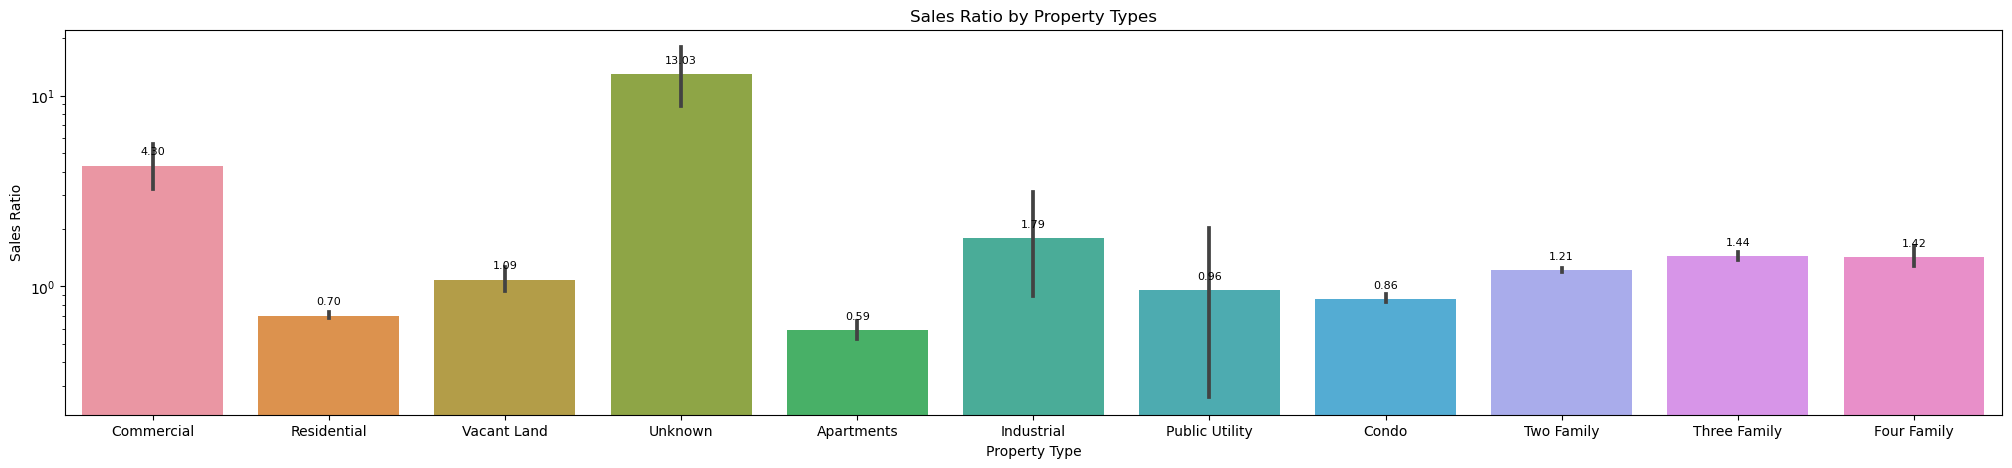

In [720]:
plt.figure(figsize=(25, 5))
b = sns.barplot(data=df, x='Property Type', y='Sales Ratio')
plt.yscale('log')
plt.title('Sales Ratio by Property Types')

# Adding data labels to the bars
for p in b.patches:
    b.annotate(format(p.get_height(), '.2f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points', fontsize=8)

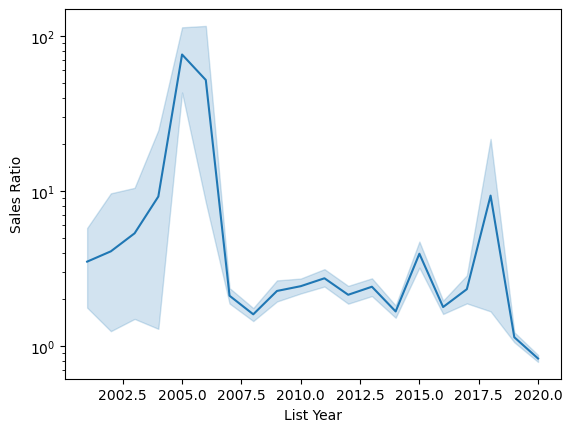

In [721]:
sns.lineplot(data=df, x='List Year', y='Sales Ratio')
plt.yscale('log')

##### Observations

 - A lot of the the residence types were unknown - this accounted for the highest sales ratio, followed by the single family residential type
- This was the same for property types, with the commercial and industrial property types accounting for the highest sales ratio behind the unknowns.

#### Geographical Analysis 

Investigate variations in assessed values, sales amounts, and market ratios across different towns, providing a localized understanding of real estate

In [724]:
# top 10 towns by total sales over the years
top10_sale_amount = df.groupby('Town')['Sale Amount'].sum().sort_values(ascending=False)[:10].reset_index()

# Create a bar chart 
fig = px.bar(
    top10_sale_amount,
    x='Sale Amount',
    y='Town',
    labels={'Town': 'Towns', 'Sale Amount': 'Total Sales'},
    title='Top 10 Towns by Sales',
    orientation='h',  
    color_discrete_sequence=['teal']  # Set color to 'darkslateblue'
)

fig.update_yaxes(categoryorder='total ascending')

# Show the customized bar chart
fig.show()

In [726]:
# bottom 10 towns by total sales over the years
bottom10_sale_amount = df.groupby('Town')['Sale Amount'].sum().sort_values(ascending=True).head(10).reset_index()

# Create a bar chart 
fig = px.bar(
    bottom10_sale_amount,
    x='Sale Amount',
    y='Town',
    labels={'Town': 'Towns', 'Sale Amount': 'Total Sales'},
    title='Bottom 10 Towns by Sales',
    color_discrete_sequence=['teal']  
)

# Show the plot
fig.show()

##### Observation
- The highest selling towns were Greenwich , Stamford, and Norwalk
- The least selling towns were Union, Scotland, and Hartland.
- Unknown was the least, accounting for a  total salesa of $282.45k.

#### Property Type Impact 
- Examine the impact of property type on assessment accuracy and market trends, exploring whether certain types (e.g., residential, commercial) exhibit distinct patterns.

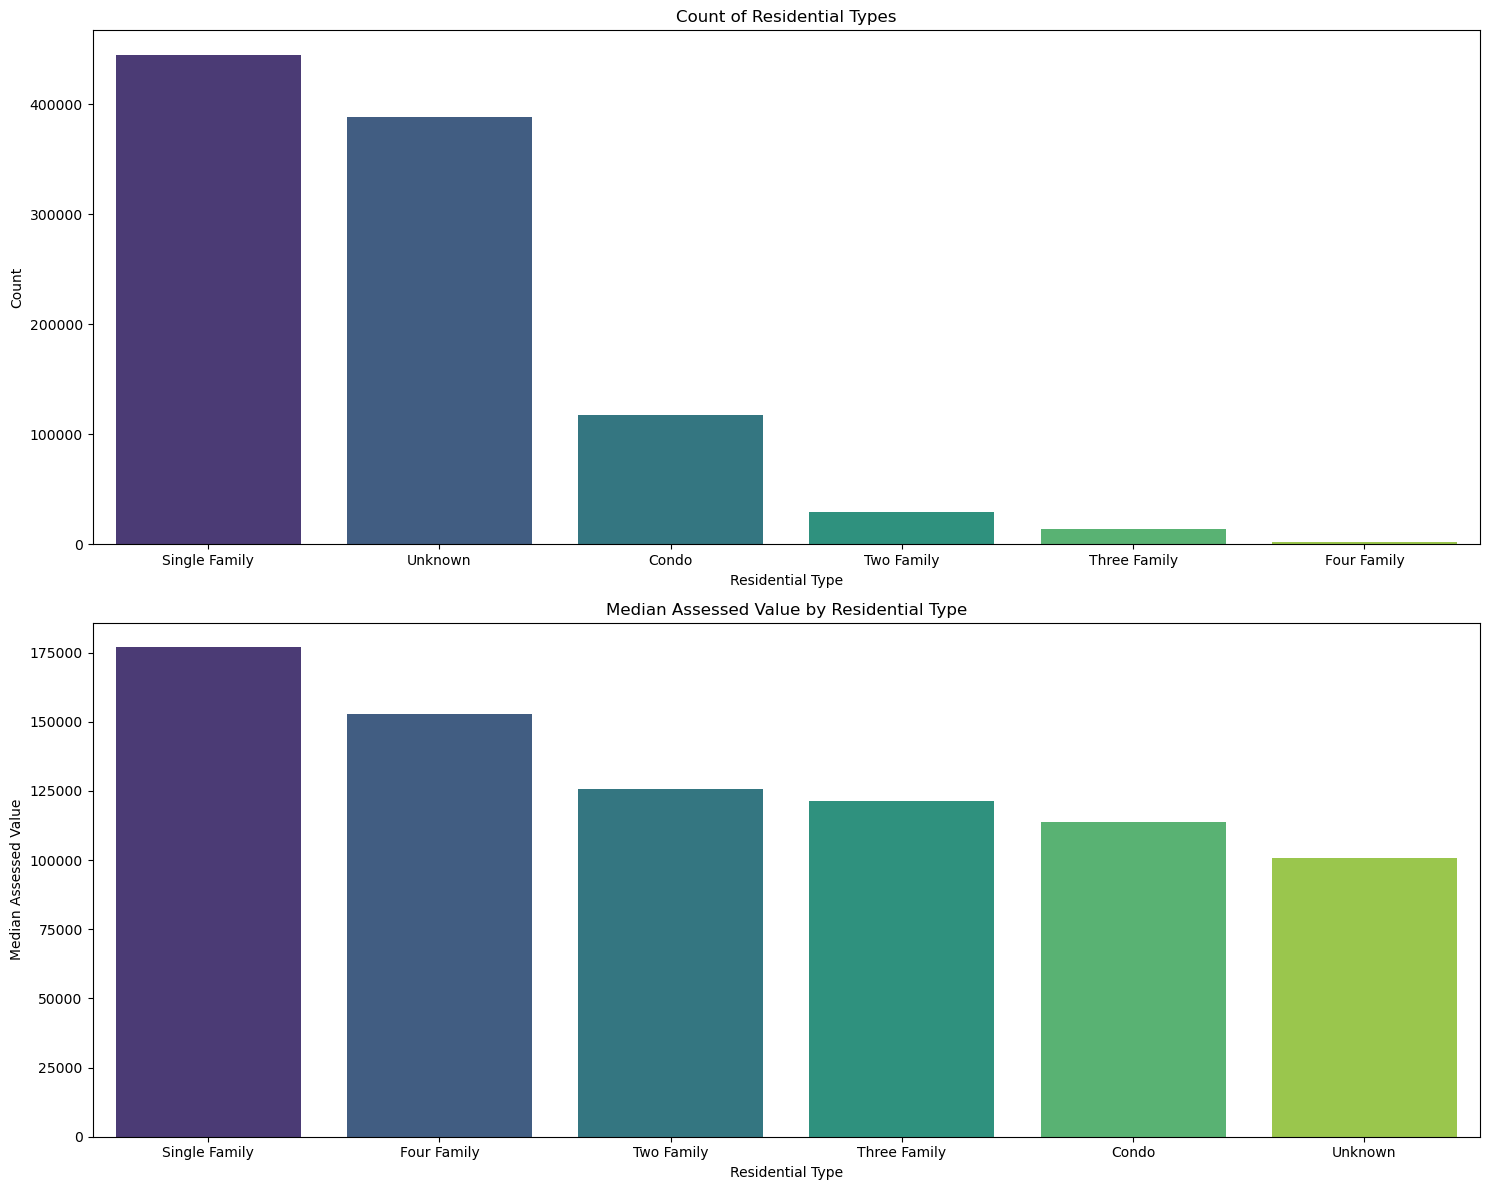

In [727]:
plt.figure(figsize=(15,12))

plt.subplot(211)
tmp_df = df["Residential Type"].value_counts()
sns.barplot(x=tmp_df.index, y=tmp_df, palette='viridis')  # Set color palette to 'viridis'
plt.title('Count of Residential Types')
plt.xlabel('Residential Type')
plt.ylabel('Count')

plt.subplot(212)
tmp_df = df.groupby("Residential Type").agg({"Assessed Value":"median"})
tmp_df = tmp_df.sort_values("Assessed Value", ascending=False)
sns.barplot(x=tmp_df.index, y=tmp_df["Assessed Value"], palette='viridis')  # Set color palette to 'viridis'
plt.title('Median Assessed Value by Residential Type')
plt.xlabel('Residential Type')
plt.ylabel('Median Assessed Value')

plt.tight_layout()
plt.show()

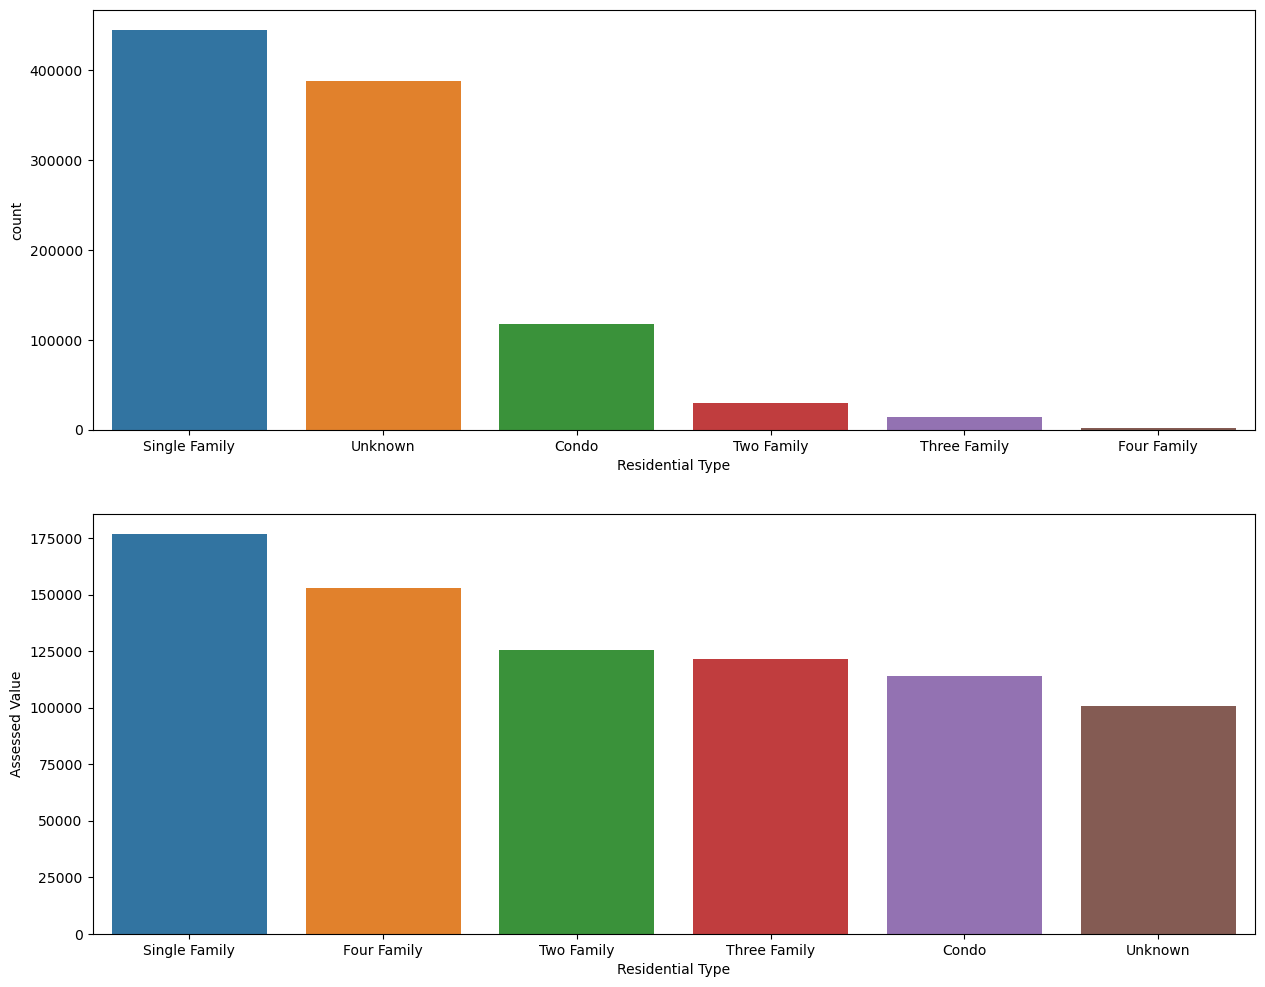

In [728]:
plt.figure(figsize=(15,12))

plt.subplot(211)
tmp_df = df["Residential Type"].value_counts()
sns.barplot(x=tmp_df.index,y=tmp_df)

plt.subplot(212)
tmp_df = df.groupby("Residential Type").agg({"Assessed Value":"median"})
tmp_df = tmp_df.sort_values("Assessed Value",ascending=False)
sns.barplot(x=tmp_df.index,y=tmp_df["Assessed Value"])
plt.show()

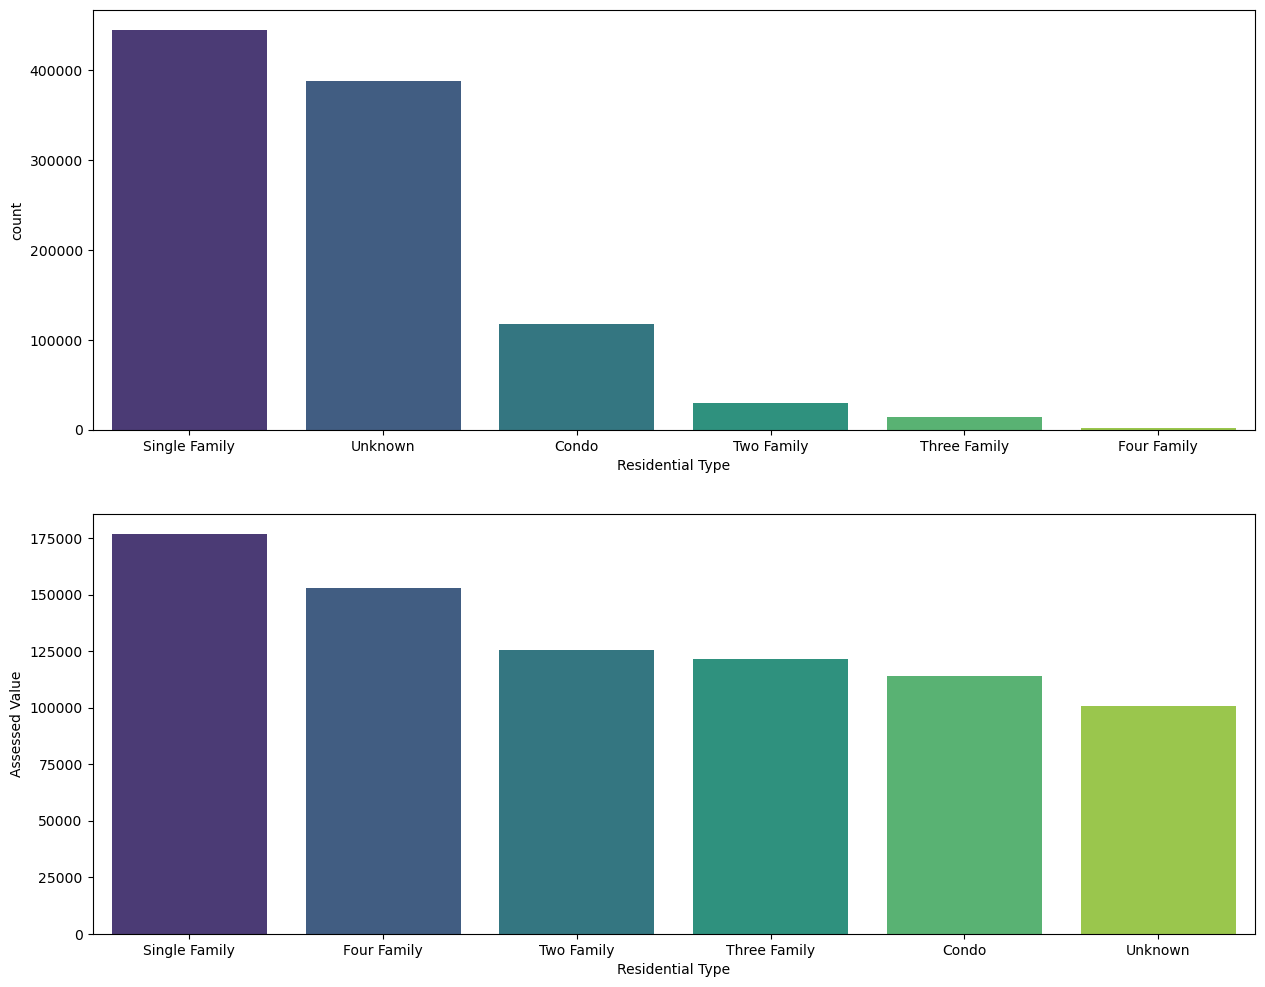

In [729]:
plt.figure(figsize=(15,12))

plt.subplot(211)
tmp_df = df["Residential Type"].value_counts()
sns.barplot(x=tmp_df.index, y=tmp_df, palette='viridis')  # Set color to 'viridis'

plt.subplot(212)
tmp_df = df.groupby("Residential Type").agg({"Assessed Value":"median"})
tmp_df = tmp_df.sort_values("Assessed Value",ascending=False)
sns.barplot(x=tmp_df.index, y=tmp_df["Assessed Value"], palette='viridis')  # Set color to 'viridis'

plt.show()

#### Observation

Single family homes were the most expensive followed by the four-family and the two-family. 

Also, how long, on average, what were the average sales ratio for each property type?

In [730]:
# find the averages
average_rt = df.groupby(df['Residential Type'])['Sales Ratio'].mean().dropna()
average_pt = df.groupby(df['Property Type'])['Sales Ratio'].mean().dropna()

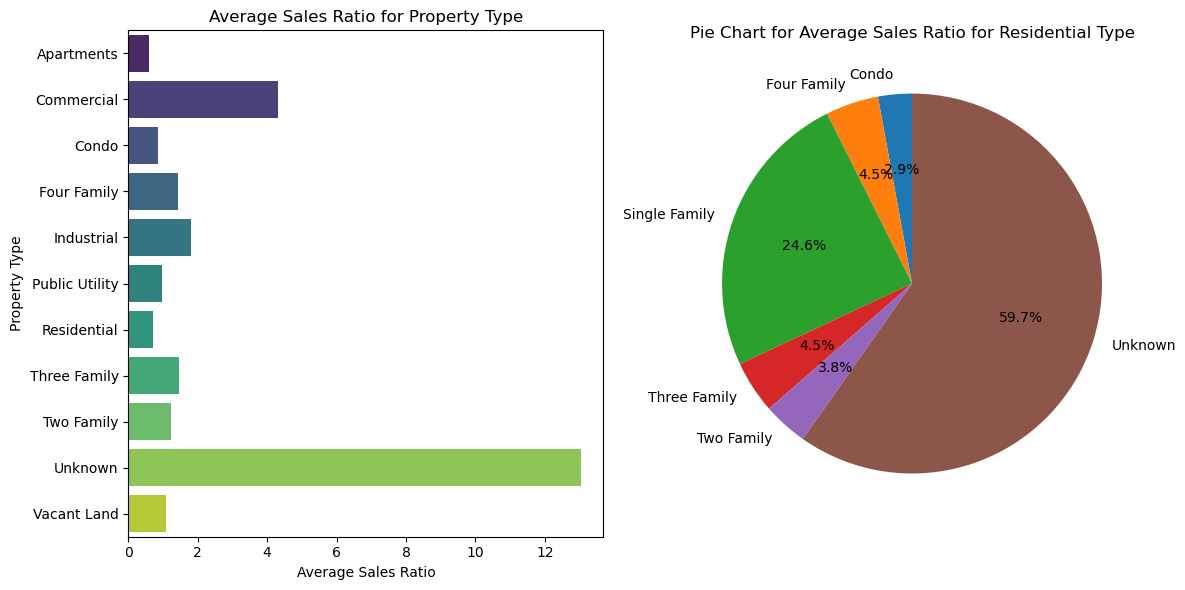

In [731]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot area plot for 'Property Type' using 'viridis' colormap
sns.barplot(x=average_pt.values, y=average_pt.index, ax=axes[0], palette='viridis')
axes[0].set_title('Average Sales Ratio for Property Type')
axes[0].set_xlabel('Average Sales Ratio')
axes[0].set_ylabel('Property Type')

# Plot pie chart for 'Residential Type' using categorical colormap
axes[1].pie(average_rt, labels=average_rt.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
axes[1].set_title('Pie Chart for Average Sales Ratio for Residential Type')

# Show the plot
plt.tight_layout()
plt.show()




#### Non-Use Code 
- Explore the significance of non-use codes in property assessment, investigating how these codes influence assessed values and sales transactions.

In [732]:
pip install wordcloud

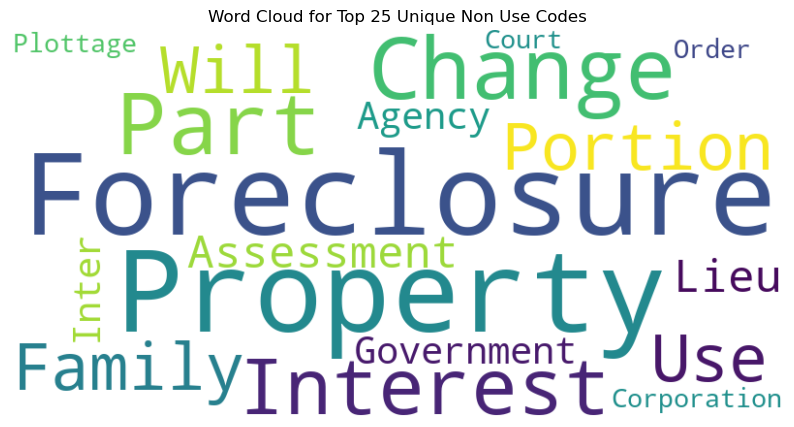

In [733]:
# Get the top unique Non Use Codes
top_unique_non_use_codes = df['Non Use Code'].value_counts().nlargest(25).index.astype(str).tolist()

# Concatenate the top unique Non Use Codes into a single string
opm_remarks_text = ' '.join(top_unique_non_use_codes)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opm_remarks_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 25 Unique Non Use Codes')
plt.show()

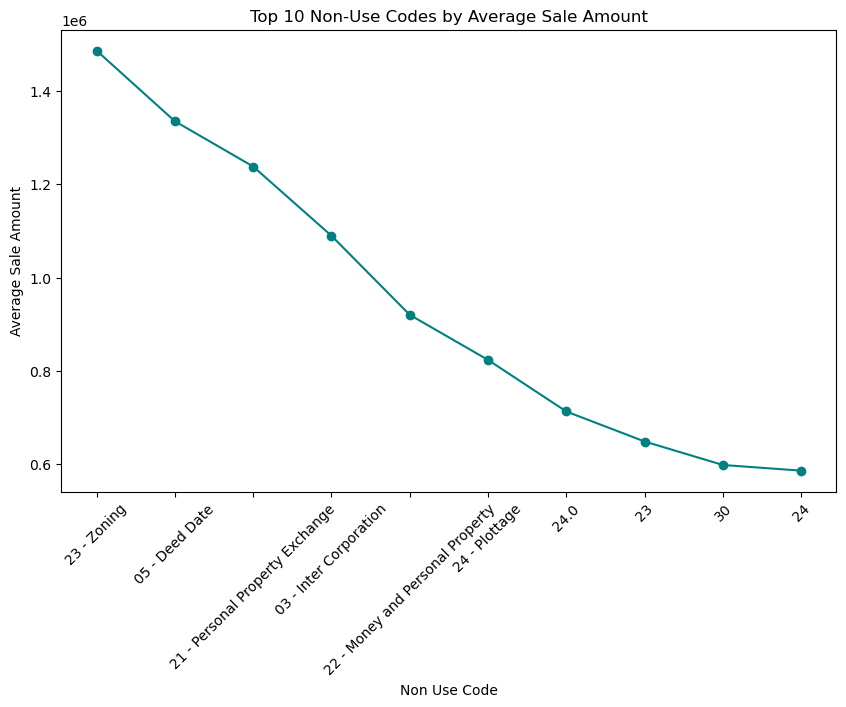

In [737]:
# average non use code by sale amount
non_use_code_analysis = df.groupby('Non Use Code')['Sale Amount'].mean()

# get the top 10 Non Use Codes
top_10_non_use_codes = non_use_code_analysis.nlargest(10)

# visualize in a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_non_use_codes.index.astype(str), top_10_non_use_codes.values, marker='o', linestyle='-', color='teal')
plt.title('Top 10 Non-Use Codes by Average Sale Amount')
plt.xlabel('Non Use Code')
plt.ylabel('Average Sale Amount')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

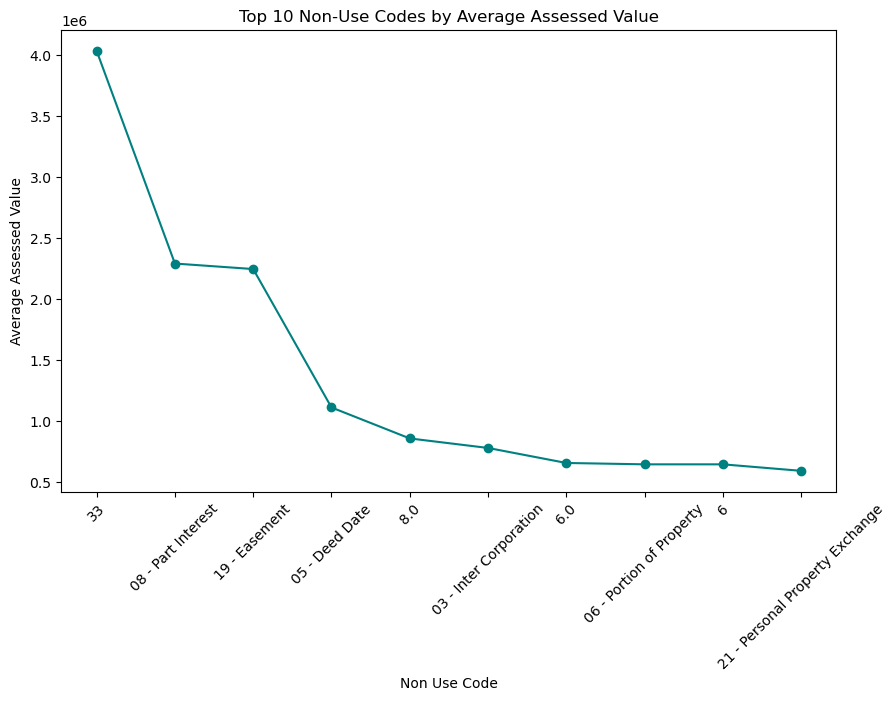

In [738]:
# average non use code by assessed value
non_use_code_analysis = df.groupby('Non Use Code')['Assessed Value'].mean()

# get the top 10 Non Use Codes
top_10_non_use_codes = non_use_code_analysis.nlargest(10)

# visualize in a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_non_use_codes.index.astype(str), top_10_non_use_codes.values, marker='o', linestyle='-', color='teal')
plt.title('Top 10 Non-Use Codes by Average Assessed Value')
plt.xlabel('Non Use Code')
plt.ylabel('Average Assessed Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



#### Observations
- The top non use codes by sales amount include Zoning, Deed Date, Personal Property Exchange, Inter corporation, etc.
- For assessed values, the top non codes include Part Interest, Easement, Deed Date, Inter Corporation, etc.
- There were also a lot of mumerical codes and alphanumerical codes applied too.
- Non Use Codes in real estate are numerical or alphanumeric identifiers used to categorize properties based on their current usage or status. 
  
 They are typically assigned by local governments or regulatory agencies and are often part of property assessment and taxation systems.
  
 Non Use Codes also indicate specific conditions or circumstances related to a property's use or status that may affect its valuation or tax treatment.
  
 The exact meaning and classification of Non Use Codes can vary between different jurisdictions.
 
 Non Use Codes play a crucial role in property assessment, taxation, and regulatory compliance. 
 
 They help authorities classify and manage properties more effectively, ensure equitable taxation, and identify properties that may require special attention or intervention.

#### Assessor and OPM Remarks

Use Assessor and OPM Remarks Analyze remarks provided by assessors and the Office of Policy and Management (OPM) to identify factors influencing assessment decisions and potential areas for improvement.

In [739]:
from wordcloud import WordCloud

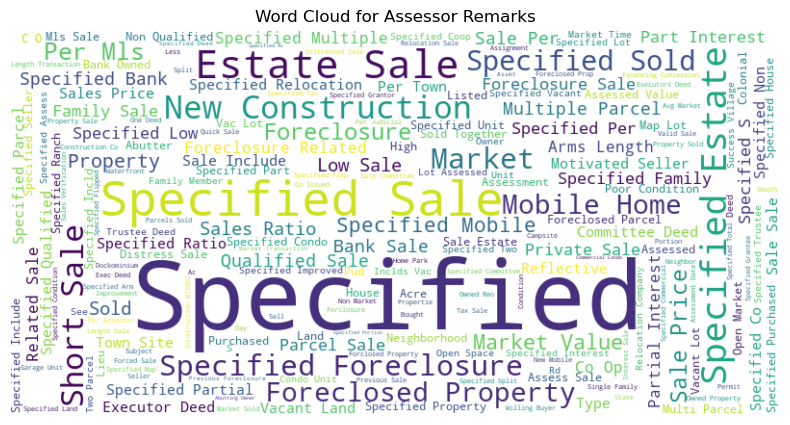

In [740]:
# Concatenate all Assessor Remarks into a single string
assessor_remarks_text = ' '.join(df['Assessor Remarks'].astype(str))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(assessor_remarks_text)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Assessor Remarks')
plt.show()

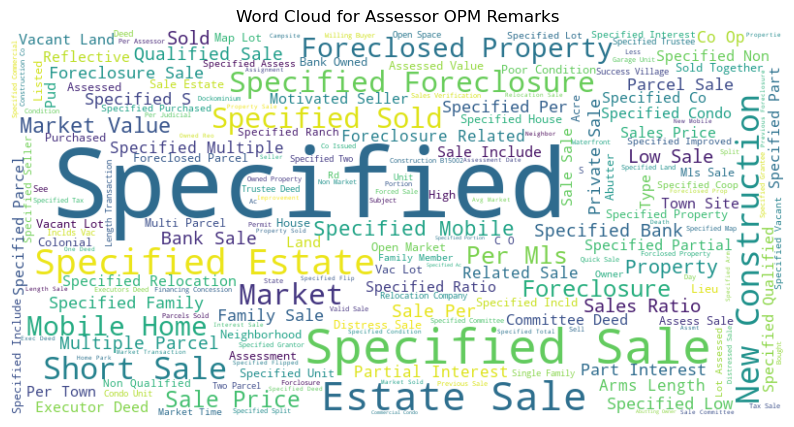

In [741]:
# Concatenate all OPM remarks into a single string
opm_remarks_text = ' '.join(df['Assessor Remarks'].astype(str))
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(opm_remarks_text)

# Plot the WordCloud image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Assessor OPM Remarks')
plt.show()

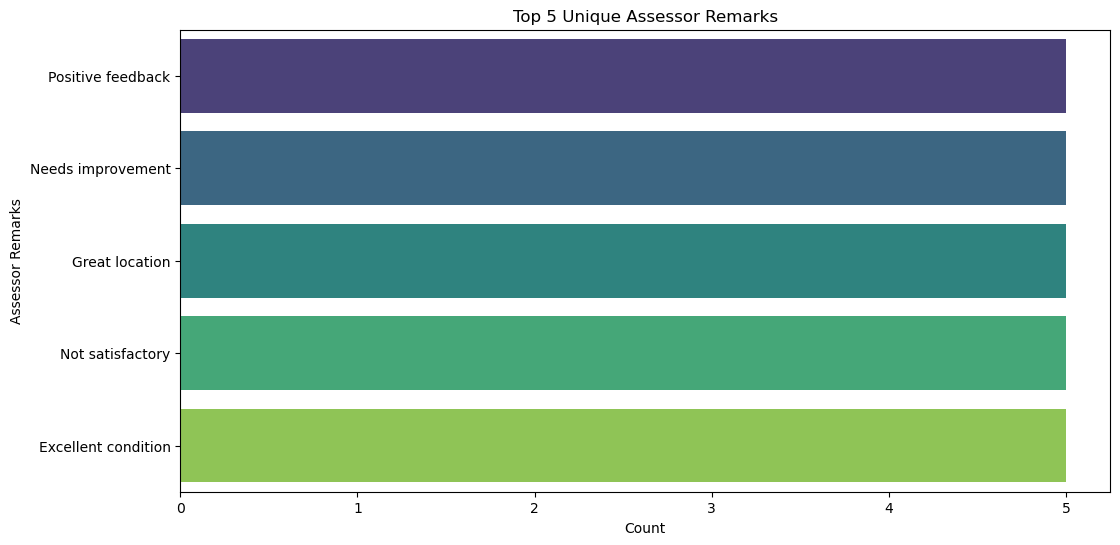

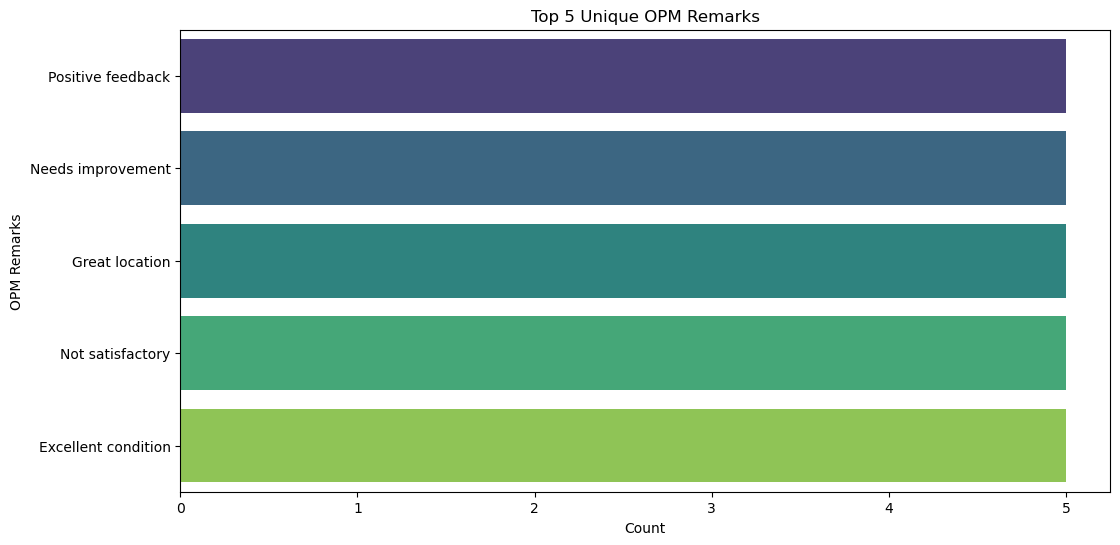

In [742]:
data = {
    'Assessor Remarks': ["Positive feedback", "Needs improvement", "Great location", "Not satisfactory", "Excellent condition"] * 5,
    'OPM Remarks': ["Positive feedback", "Needs improvement", "Great location", "Not satisfactory", "Excellent condition"] * 5,
}

df = pd.DataFrame(data)

# Set the number of top remarks you want to include
top_n = 10

# Get the top 10 unique comments for Assessor Remarks
top_assessor_remarks = df['Assessor Remarks'].value_counts().head(top_n)

# Get the top 10 unique comments for OPM Remarks
top_opm_remarks = df['OPM Remarks'].value_counts().head(top_n)

# Plotting the bar plot for Assessor Remarks
plt.figure(figsize=(12, 6))
sns.barplot(x=top_assessor_remarks.values, y=top_assessor_remarks.index, palette='viridis')
plt.title('Top 5 Unique Assessor Remarks')
plt.xlabel('Count')
plt.ylabel('Assessor Remarks')
plt.show()

# Plotting the bar plot for OPM Remarks
plt.figure(figsize=(12, 6))
sns.barplot(x=top_opm_remarks.values, y=top_opm_remarks.index, palette='viridis')
plt.title('Top 5 Unique OPM Remarks')
plt.xlabel('Count')
plt.ylabel('OPM Remarks')
plt.show()

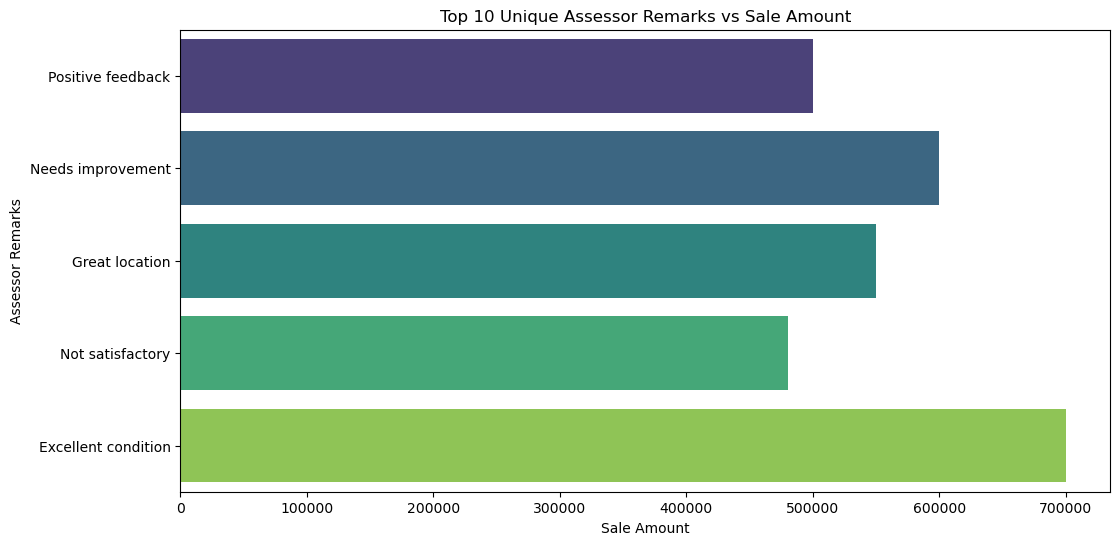

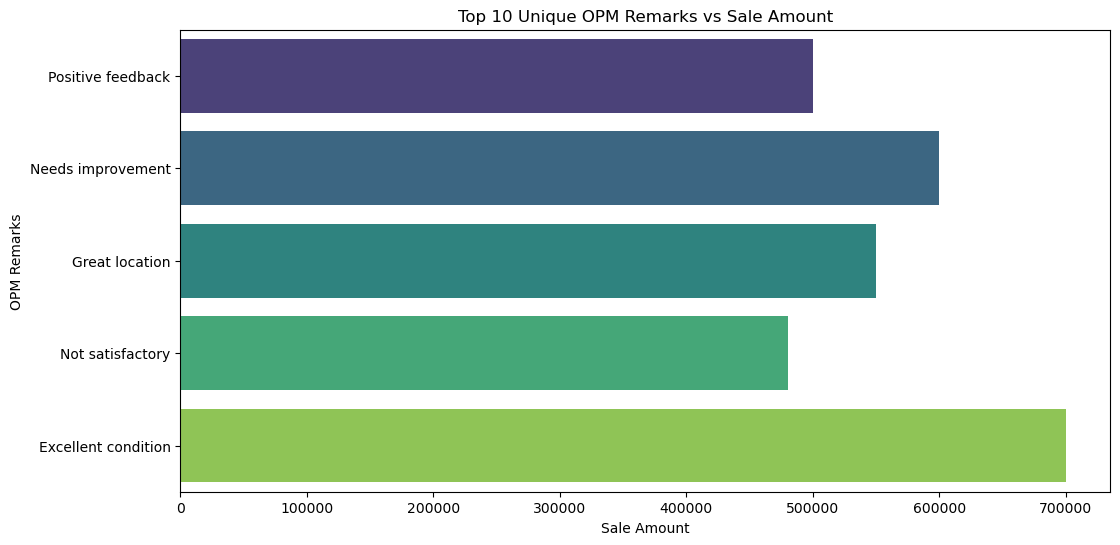

In [743]:
# show rmarks against sales amount
data = {
    'Assessor Remarks': ["Positive feedback", "Needs improvement", "Great location", "Not satisfactory", "Excellent condition"] * 5,
    'OPM Remarks': ["Positive feedback", "Needs improvement", "Great location", "Not satisfactory", "Excellent condition"] * 5,
    'Sale Amount': [500000, 600000, 550000, 480000, 700000] * 5,
}

df = pd.DataFrame(data)

# Set the number of top remarks you want to include
top_n = 10

# Get the top 10 unique comments for Assessor Remarks
top_assessor_remarks = df['Assessor Remarks'].value_counts().head(top_n).index

# Get the top 10 unique comments for OPM Remarks
top_opm_remarks = df['OPM Remarks'].value_counts().head(top_n).index

# Filter the DataFrame to include only rows with top remarks
filtered_df = df[df['Assessor Remarks'].isin(top_assessor_remarks) | df['OPM Remarks'].isin(top_opm_remarks)]

# Plotting the bar plot against Sale Amount
plt.figure(figsize=(12, 6))
sns.barplot(x='Sale Amount', y='Assessor Remarks', data=filtered_df, palette='viridis')
plt.title('Top 10 Unique Assessor Remarks vs Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('Assessor Remarks')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Sale Amount', y='OPM Remarks', data=filtered_df, palette='viridis')
plt.title('Top 10 Unique OPM Remarks vs Sale Amount')
plt.xlabel('Sale Amount')
plt.ylabel('OPM Remarks')
plt.show()

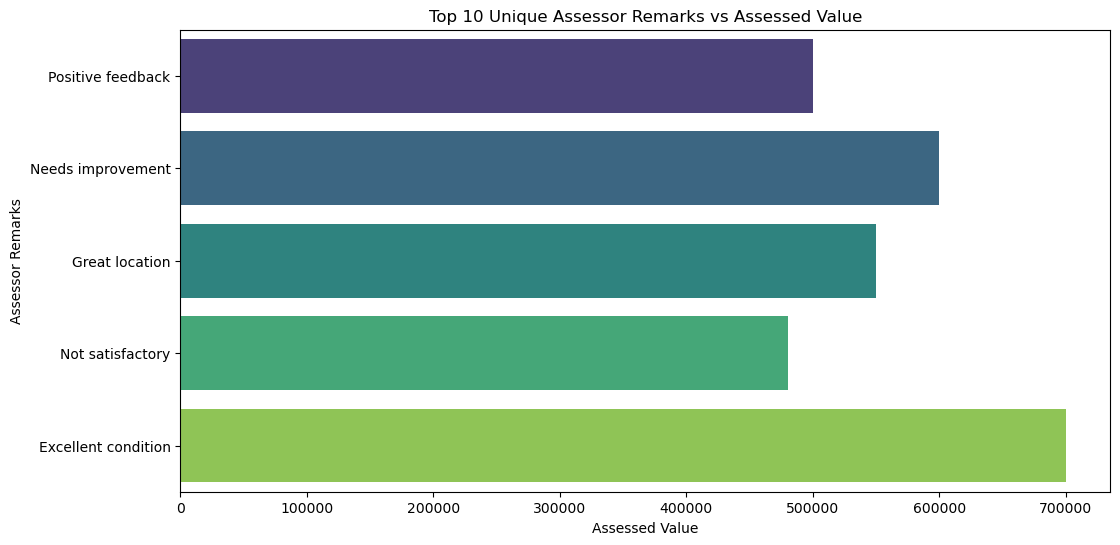

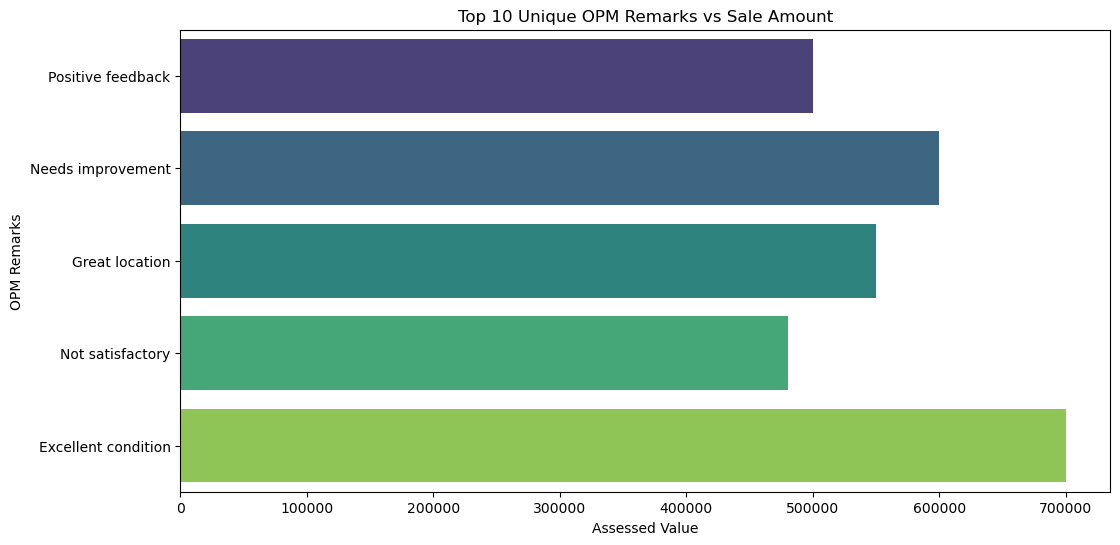

In [744]:
data = {
    'Assessor Remarks': ["Positive feedback", "Needs improvement", "Great location", "Not satisfactory", "Excellent condition"] * 5,
    'OPM Remarks': ["Positive feedback", "Needs improvement", "Great location", "Not satisfactory", "Excellent condition"] * 5,
    'Assessed Value': [500000, 600000, 550000, 480000, 700000] * 5,
}

df = pd.DataFrame(data)

# Set the number of top remarks you want to include
top_n = 10

# Get the top 10 unique comments for Assessor Remarks
top_assessor_remarks = df['Assessor Remarks'].value_counts().head(top_n).index

# Get the top 10 unique comments for OPM Remarks
top_opm_remarks = df['OPM Remarks'].value_counts().head(top_n).index

# Filter the DataFrame to include only rows with top remarks
filtered_df = df[df['Assessor Remarks'].isin(top_assessor_remarks) | df['OPM Remarks'].isin(top_opm_remarks)]

# Plotting the bar plot against Sale Amount
plt.figure(figsize=(12, 6))
sns.barplot(x='Assessed Value', y='Assessor Remarks', data=filtered_df, palette='viridis')
plt.title('Top 10 Unique Assessor Remarks vs Assessed Value')
plt.xlabel('Assessed Value')
plt.ylabel('Assessor Remarks')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Assessed Value', y='OPM Remarks', data=filtered_df, palette='viridis')
plt.title('Top 10 Unique OPM Remarks vs Sale Amount')
plt.xlabel('Assessed Value')
plt.ylabel('OPM Remarks')
plt.show()

In [745]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Apply label encoding to 'Assessor Remarks' and 'OPM Remarks'
df['Assessor Remarks Encoded'] = le.fit_transform(df['Assessor Remarks'])
df['OPM Remarks Encoded'] = le.fit_transform(df['OPM Remarks'])

# Calculate the correlation between the encoded columns
corr = df['Assessor Remarks Encoded'].corr(df['OPM Remarks Encoded'])

print(f'Correlation coefficient: {corr}')

Correlation coefficient: 1.0


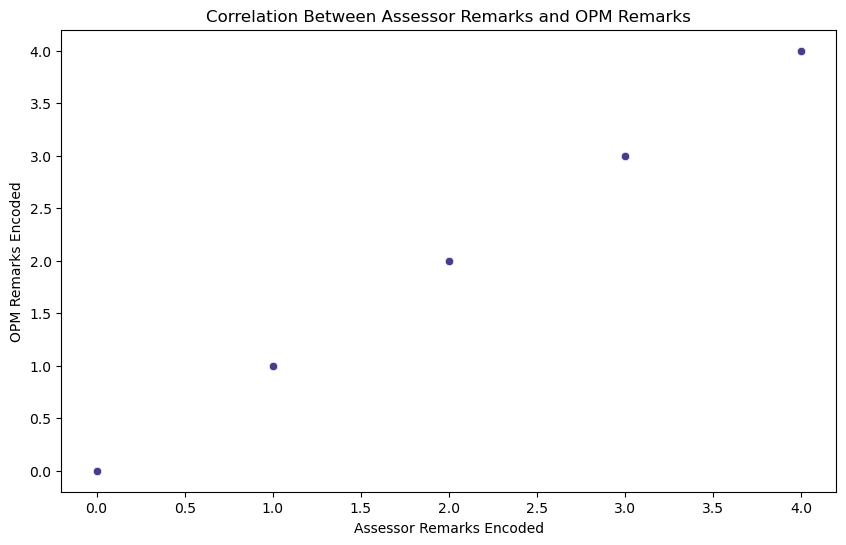

In [746]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x='Assessor Remarks Encoded', y='OPM Remarks Encoded', data=df, color='darkslateblue')
plt.title('Correlation Between Assessor Remarks and OPM Remarks')
plt.xlabel('Assessor Remarks Encoded')
plt.ylabel('OPM Remarks Encoded')

# Display the plot
plt.show()

This means that there is perfect positive corellation.
When two variables have a perfect positive correlation, it means that as one variable increases, the other variable also increases in a linear fashion. 

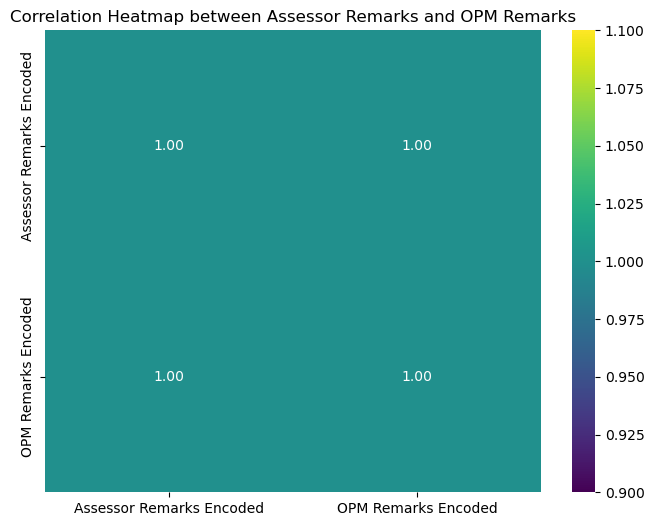

In [747]:
# Create a label encoder
le = LabelEncoder()

# Apply label encoding to 'Assessor Remarks' and 'OPM Remarks'
df['Assessor Remarks Encoded'] = le.fit_transform(df['Assessor Remarks'])
df['OPM Remarks Encoded'] = le.fit_transform(df['OPM Remarks'])

# Check correlation between encoded columns
corr_matrix = df[['Assessor Remarks Encoded', 'OPM Remarks Encoded']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap between Assessor Remarks and OPM Remarks')
plt.show()

#### Observations 

When the remarks were compared against Sale Value and Assesed amount, it was observed that: 
- the  'Excellent Condition' remarks sold the highest, followed by
- the 'Needs Improvements' remarks, then,
- the 'Great Location', and
- the 'Positive Feedback' remarks.
- the 'Not Satisfactory' remarks sold the least.

Also,
- there is perfect correlation between the Assessor Remarks and the OPM Remarks.

### Summary

In order to empower stakeholders in the real estate sector with actionable insights for better decision-making and improved accuracy in property assessments:

1. Stake holders can improve the accuracy of property assessments by:

 - reviewing sales data and comparing assessed values with actual sale prices of properties to identify discrepancies.
 - conducting spatial analysis in order identify clusters of properties with similar assessment discrepancies. 
 - gathering feedback from property owners regarding their assessment experience.
 - analyzing historical assessment data to identify any patterns or trends in assessment accuracy over time. 


2. Stakeholders can gain a nuanced understanding of market trends by:

- consistently gathering and analyzing and  relevant data, including property sales data, rental data, market reports, economic indicators, and demographic information and ensuring that the data covers a sufficient time period to capture both current and historical trends. 

- segmenting the market based on various criteria such as property type, location, price range, and buyer demographics and analyzing each segment separately to identify unique trends and patterns that may influence decision-making.

- comparing market trends and performance indicators across different geographical areas, property types, and market segments. Identify areas of strength and weakness relative to comparable markets and assess the factors driving differences.

- soliciting feedback from stakeholders and incorporating their input into the analysis process and also continuously refining and updating the analysis based on new data and changing market conditions to ensure relevance and accuracy.


3. Regional planning and investment decisions can be improved by:

- gathering relevant data specific to each town, including demographic information, economic indicators, real estate market data, infrastructure development plans, zoning regulations, environmental factors, and historical trends.
The data must be collected from reliable sources to ensure its accuracy and completeness.

- analyzing demographic data to understand the population composition, growth trends, income levels, education levels, and household characteristics within each town and identifying demographic shifts and emerging trends that may impact housing demand, consumer behavior, and community needs.

- conducting a thorough analysis of the local real estate market, including property prices, rental rates, inventory levels, sales volume, and market trends. Compare market performance across different neighborhoods within the town to identify areas of strength and opportunity for investment.

- engaging and collaborating with local stakeholders, including government officials, community leaders, developers, investors, and residents, to understand their needs, priorities, and vision for the town.

- evaluating potential risks and vulnerabilities facing each town, such as environmental hazards, climate change impacts, economic shocks, and social challenges. Also developing risk mitigation strategies and resilience plans to enhance the town's capacity to withstand and recover from adverse events.

- provide evidence-based policy recommendations and strategic guidance to local decision-makers and planners to support informed decision-making and sustainable development, also advocating for policies and initiatives that promote equitable growth.


4. Property type impacts on assessment outcomes may be due to:

- location
- property size and features
- property use or the intended use of the property
- market demand
- supply and demand dynamics
- economic conditions: 
- zoning and land use regulations
- investment potential
- property condition
- market perception.


5. Non-use codes in property assessment can provide valuable insights into patterns and potential areas for real estate policy refinement in the following ways:

- identification of under-utilized properties
- assessment uniformity and equity
- identification of tax delinquency patterns
- policy evaluation and adjustment
- strategic planning and land use management.


6. Assessor and Office of Policy and Management (OPM) remarks can be utilized to improve communication and transparency in the assessment process in several ways:

- clarification of assessment decisions
- disclosure of data limitations and assumptions
- documentation of property characteristics and conditions
- resolution of assessment disputes and inquiries
- public access to assessment information
- stakeholder engagement and collaboration
- continuous improvement and quality assurance.


### Recommendations

Stakeholders in the real estate sector can be empowered for better decision-making and improved accuracy in property assessments through the following  key strategies:

 - Firstly, giving real estate professionals access to comprehensive and up-to-date data, including market trends, market research reports, real-time property data, property transactions, and comparable sales, is crucial for informed decision-making. 
 
  - Investing in data analytics tools and technology can help stakeholders analyze and interpret data effectively, enabling them to identify market trends, assess property values accurately, and make informed investment decisions based on current market conditions and future projections.
  
 - Additionally, fostering collaboration and knowledge-sharing among stakeholders, including real estate agents, appraisers, lenders, and policymakers, can enhance collective expertise and promote best practices in property valuation.
 
  -  Moreover, promoting transparency and accountability in the assessment process, along with adherence to professional standards and ethical guidelines, is essential for building trust and confidence among stakeholders. 
  
 - Finally, ongoing education and training programs tailored to the needs of different stakeholders(real estate professionals, appraisers, and assessors) can enhance their skills, knowledge, and competency in property valuation,decision-making processes and achieve greater accuracy in property assessments, ultimately driving better outcomes for all parties involved.